In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
def get_metrics_lists(lines):
    model_names = [lines[0][:-1],lines[5][0:-1],lines[10][0:-1]]
    mse = [lines[1].split(":")[1][:-1],lines[6].split(":")[1][:-1],lines[11].split(":")[1][:-1]]
    wape = [lines[2].split(":")[1][:-1],lines[7].split(":")[1][:-1],lines[12].split(":")[1][:-1]]
    r2 = [lines[3].split(":")[1][:-1],lines[8].split(":")[1][:-1],lines[13].split(":")[1][:-1]]
    mse = list(map(float, mse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names, mse, wape, r2

In [3]:
def get_ml_metrics(lines):
    model_names = [lines[0][:-1], lines[4][0:-1]]
    mse = [lines[1].split(":")[1][:-1],lines[5].split(":")[1][:-1]]
    wape = [lines[2].split(":")[1][:-1],lines[6].split(":")[1][:-1]]
    r2 = [lines[3].split(":")[1][:-1],lines[7].split(":")[1][:-1]]
    mse = list(map(float, mse))
    wape = list(map(float, wape))
    r2 = list(map(float, r2))
    return model_names, mse, wape, r2

In [4]:
def get_cluster_metrics(lines):
    cursor = 0
    model_names, mse, wape, r2, number_clust = [], [], [], [], []
    for i in lines:
        if i.startswith("Number"):
            number_clust.append(int(i[-3:-1].strip()))
        else:
            if cursor == 0:
                model_names.append(i[:-1])
                cursor += 1
            elif cursor == 1:
                mse.append(i.split(":")[1][:-1])
                cursor += 1
            elif cursor == 2:
                wape.append(i.split(":")[1][:-1])
                cursor += 1
            elif cursor == 3:
                r2.append(i.split(":")[1][:-1])
                cursor = 0
    mse = list(map(float, mse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names, mse, wape, r2, number_clust
            

In [5]:
with open('gpu_logs/cluster_preds.txt') as f:
    l = f.readlines()
    lines = [s for s in l if re.search(r'\w+', s)]
lines

['Number of Clusters: 2\n',
 'Linear Regression\n',
 'MSE: 0.1880\n',
 'WAPE: 32.13\n',
 'R2: 0.7596\n',
 'XGBoost\n',
 'MSE: 0.1631\n',
 'WAPE: 29.33\n',
 'R2: 0.7913\n',
 'Random Forest\n',
 'MSE: 0.1539\n',
 'WAPE: 27.93\n',
 'R2: 0.8031\n',
 'Number of Clusters: 3\n',
 'Linear Regression\n',
 'MSE: 0.1853\n',
 'WAPE: 32.10\n',
 'R2: 0.7605\n',
 'XGBoost\n',
 'MSE: 0.1621\n',
 'WAPE: 29.29\n',
 'R2: 0.7905\n',
 'Random Forest\n',
 'MSE: 0.1523\n',
 'WAPE: 27.89\n',
 'R2: 0.8032\n',
 'Number of Clusters: 4\n',
 'Linear Regression\n',
 'MSE: 0.1882\n',
 'WAPE: 32.18\n',
 'R2: 0.7571\n',
 'XGBoost\n',
 'MSE: 0.1629\n',
 'WAPE: 29.32\n',
 'R2: 0.7897\n',
 'Random Forest\n',
 'MSE: 0.1560\n',
 'WAPE: 28.12\n',
 'R2: 0.7987\n',
 'Number of Clusters: 5\n',
 'Linear Regression\n',
 'MSE: 0.1865\n',
 'WAPE: 32.11\n',
 'R2: 0.7595\n',
 'XGBoost\n',
 'MSE: 0.1626\n',
 'WAPE: 29.28\n',
 'R2: 0.7903\n',
 'Random Forest\n',
 'MSE: 0.1547\n',
 'WAPE: 27.91\n',
 'R2: 0.8005\n',
 'Number of Clusters

In [33]:
def show_metric_per_cluster(metric, metric_name, number_clust, title, filename):
    plt.plot(number_clust, metric)
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

In [6]:
def show_cluster_graphic(lines, title, filename):
    model_names, mse, wape, r2, number_clust = get_cluster_metrics(lines)
    X_names = ['MSE', 'WAPE', 'R2']
    X_axis = np.arange(len(X_names))
    pos = 0
    bar_width = 0.15
    fig, ax = plt.subplots()
    for i in (0,1):# range(len(set(model_names))):
        for j in range(len(set(model_names))):
            bar = (mse[j], wape[j], r2[j])
            b = ax.bar(X_axis + pos, bar, bar_width-0.01, label=model_names[j])
            pos = pos + bar_width
            ax.bar_label(b, fontsize=6, fmt='%.3f')
        break
    ax.set_ylim(0,1)
    ax.set_xticks(X_axis+bar_width+bar_width/2,X_names)
    ax.set_xlabel("Model Comparison")
    ax.set_ylabel("Metrics")
    ax.set_title(title)
    ax.legend()
    #plt.savefig(filename)
    plt.show()

In [22]:
def show_graphic(lines, lines_noml, title, filename):
    no_ml, mse_no, wape_no, r2_no = get_ml_metrics(lines_noml)
    model_names, mse, wape, r2 = get_metrics_lists(lines)
    model_names.insert(0,no_ml[0])
    mse.insert(0,mse_no[0])
    wape.insert(0,wape_no[0])
    r2.insert(0,r2_no[0])
    X_names = ['MSE', 'WAPE', 'R2']
    X_axis = np.arange(len(X_names))
    pos = 0
    bar_width = 0.15
    fig, ax = plt.subplots()

    for i in range(len(model_names)):
        bar = (mse[i], wape[i], r2[i])
        b = ax.bar(X_axis + pos, bar, bar_width-0.01, label=model_names[i])
        pos = pos + bar_width
        ax.bar_label(b, fontsize=6, fmt='%.3f')
        
    ax.set_ylim(0,1)
    ax.set_xticks(X_axis+bar_width+bar_width/2,X_names)
    ax.set_xlabel("Model Comparison")
    ax.set_ylabel("Metrics")
    ax.set_title(title)
    ax.legend()
    #plt.savefig(filename)
    plt.show()

In [ ]:
for j in range(len(set(model_names))):
    for i in range(0,3):
        if i == 0:
            show_metric_per_cluster(mse[j::3], "MSE", number_clust, "MSE per Number of Clusters in {}".format(model_names[j]), "images/clusters/mse_{}".format(model_names[j]))
        elif i == 1:
            show_metric_per_cluster(wape[j::3], "WAPE", number_clust, "WAPE per Number of Clusters in {}".format(model_names[j]), "images/clusters/wape_{}".format(model_names[j]))
        else:
            show_metric_per_cluster(r2[j::3], "R2 Score", number_clust, "R2 per Number of Clusters in {}".format(model_names[j]), "images/clusters/r2_{}".format(model_names[j]))

In [5]:
with open('gpu_logs/no_ml.txt') as f:
    lines_noml = f.readlines()
lines_noml = lines_noml[1:9]
lines_noml

['No_ML\n',
 'MSE: 0.2223\n',
 'WAPE: 0.3078\n',
 'R2: 0.7108\n',
 'No_ML_Aggregated\n',
 'MSE: 0.0051\n',
 'WAPE: 0.22\n',
 'R2: 0.6776\n']

In [6]:
with open('gpu_logs/selected_7days.txt') as f:
    lines = f.readlines()
lines_porto = lines[-14:]
lines_porto

['Linear Regression\n',
 'Total Averaged MSE: 0.204\n',
 'Total Averaged WAPE: 31.896\n',
 'Total Averaged R2: 0.756\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 0.174\n',
 'Total Averaged WAPE: 29.288\n',
 'Total Averaged R2: 0.792\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 0.144\n',
 'Total Averaged WAPE: 26.866\n',
 'Total Averaged R2: 0.828\n']

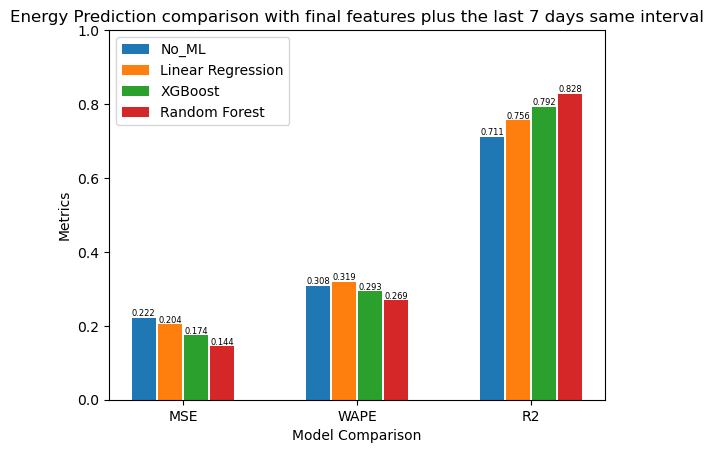

In [23]:
show_graphic(lines_porto, lines_noml, "Energy Prediction comparison with final features plus the last 7 days same interval", 'images/tmp.png')